# Ordinary Least Squares and Maximum Likelihood Estimation (cont.)

# linMod.py

In [1]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import statsmodels.api as sm
import os

In [2]:
os.chdir('../KocPythonFall2021/inclass/6LinMod/')

In [3]:
data = pd.read_stata('TamingGods.dta')

In [4]:
data.head()

,ccode,year,LND_TOTL,Int_maxyear,polity2_,pts,democracy,loggdp,logpop,Religion,...,NX_scaled,relconflict,relconflict2,RAS4,altRAS4,scaled_RAS42,relmob_vary_lessz,reldemand_vary_lessz,relconflict_lessz,SuperaltRAS4
0,2.0,1980,9158960.0,0.0,10.0,1.0,1.0,10.146846,19.241451,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2.0,1981,9158960.0,0.0,10.0,1.0,1.0,10.162127,19.251265,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2.0,1982,9158960.0,0.0,10.0,1.0,1.0,10.132593,19.260799,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2.0,1983,9158960.0,0.0,10.0,1.0,1.0,10.167618,19.269943,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2.0,1984,9158960.0,0.0,10.0,1.0,1.0,10.228435,19.278601,0.824078,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,ccode,year,LND_TOTL,Int_maxyear,polity2_,pts,democracy,loggdp,logpop,Religion,...,NX_scaled,relconflict,relconflict2,RAS4,altRAS4,scaled_RAS42,relmob_vary_lessz,reldemand_vary_lessz,relconflict_lessz,SuperaltRAS4
count,7208.000000,7208.000000,5.947000e+03,6930.000000,5173.000000,5481.000000,5346.000000,5529.000000,6342.000000,6494.000000,...,3247.000000,6360.000000,7208.000000,6148.000000,7208.000000,3306.000000,1407.000000,1407.000000,1340.000000,3247.000000
mean,480.193396,1996.500000,6.022888e+05,0.192929,1.991301,2.323572,0.563786,8.143382,15.142727,0.441102,...,1.479770,0.104403,0.065205,1.003060,9.154411,1.073094,0.189055,0.144989,0.495522,6.480630
std,265.230961,9.811389,1.473004e+06,0.486660,6.942513,1.205023,0.629304,2.179216,2.403559,0.233680,...,1.880340,0.524993,0.338005,1.817504,18.358076,1.249870,0.391691,0.352216,1.055930,5.700305
min,2.000000,1980.000000,0.000000e+00,0.000000,-9.000000,0.000000,0.000000,0.000000,5.573728,0.002286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,313.750000,1988.000000,2.517500e+04,0.000000,-6.000000,1.500000,0.000000,7.361599,13.949541,0.232569,...,0.178571,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,2.178571
50%,456.500000,1996.500000,1.204100e+05,0.000000,4.000000,2.000000,1.000000,8.448858,15.519416,0.462810,...,0.714286,0.000000,0.000000,0.000000,0.000000,0.588889,0.000000,0.000000,0.000000,4.452213
75%,694.500000,2005.000000,5.279700e+05,0.000000,9.000000,3.000000,1.000000,9.530067,16.644045,0.646941,...,1.964286,0.000000,0.000000,1.121495,10.000000,1.544444,0.000000,0.000000,0.000000,9.890342
max,990.000000,2013.000000,9.327489e+06,2.000000,10.000000,5.000000,5.000000,11.723465,21.023886,0.870472,...,10.000000,3.000000,2.000000,10.000000,107.000000,5.888889,1.000000,1.000000,3.000000,25.535713


In [6]:
data.columns

Index(['ccode', 'year', 'LND_TOTL', 'Int_maxyear', 'polity2_', 'pts',
       'democracy', 'loggdp', 'logpop', 'Religion', 'Ethnic', 'lmtnest',
       'pctforest', 'Meast', 'relmob_vary', 'reldemand_vary', 'conflict',
       'cem_strata', 'cem_matched', 'cem_weights', 'recency', 'ongoing',
       'propensity', 'RASindex3_scaled', 'MX_scaled', 'SCX_scaled',
       'NX_scaled', 'relconflict', 'relconflict2', 'RAS4', 'altRAS4',
       'scaled_RAS42', 'relmob_vary_lessz', 'reldemand_vary_lessz',
       'relconflict_lessz', 'SuperaltRAS4'],
      dtype='object')

- There is a pdf with explanations of variables.
- Lets check if ethnic fractionalization is correlated with religious repression.

In [7]:
y = data['Religion']
X = pd.DataFrame(data['Ethnic'])

X['constant'] = 1

In [8]:
myFit = sm.OLS(y, X, missing = 'drop').fit()

In [9]:
myFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Religion   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     177.4
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           6.09e-40
Time:                        21:16:51   Log-Likelihood:                 349.47
No. Observations:                6358   AIC:                            -694.9
Df Residuals:                    6356   BIC:                            -681.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ethnic         0.1491      0.011     13.320      0.000       0.127       0.171
constant       0.3779      0.006     66.393      0.000       0.367       0.389
==============================================================================
Omnibus:                     1634.092   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.477
Skew:                          -0.227   Prob(JB):                     4.70e-72
Kurtosis:                       1.983   Cond. No.                         4.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
myFit.conf_int()

,0,1
Ethnic,0.127188,0.171087
constant,0.366717,0.389032


- Now lets code our own MLE algorithm.
- Rather than maximize LL, minimize neg LL.
- Define likelihood function.

In [11]:
def MLERegression(params):
    intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
    yhat = intercept + beta * X # predictions # next, we flip the Bayesian question
    # compute PDF of observed values manually normally distributed around mean (yhat) with a standard deviation of sd
    negLL = -np.sum(stats.norm.logpdf(y, loc=yhat, scale=sd)) # return negative LL
    return negLL

In [12]:
# let's start with some random coefficient guesses and optimize
dd = data[['Religion', 'Ethnic']].dropna()

y = dd['Religion']
X = dd['Ethnic']

guess = np.array([.5, .5, 2])
results = minimize(MLERegression, guess, method = 'Nelder-Mead', options = {'disp': True, 'maxiter': 1000})

Optimization terminated successfully.
         Current function value: -349.470683
         Iterations: 96
         Function evaluations: 172


In [13]:
results

 final_simplex: (array([[0.37786288, 0.14915948, 0.22903925],
       [0.37783905, 0.14921483, 0.22903905],
       [0.37789332, 0.14912562, 0.22900957],
       [0.37787368, 0.14906955, 0.2290257 ]]), array([-349.47068288, -349.47066157, -349.47063624, -349.47061844]))
           fun: -349.4706828801385
       message: 'Optimization terminated successfully.'
          nfev: 172
           nit: 96
        status: 0
       success: True
             x: array([0.37786288, 0.14915948, 0.22903925])

In [14]:
myFit.params

Ethnic      0.149138
constant    0.377875
dtype: float64

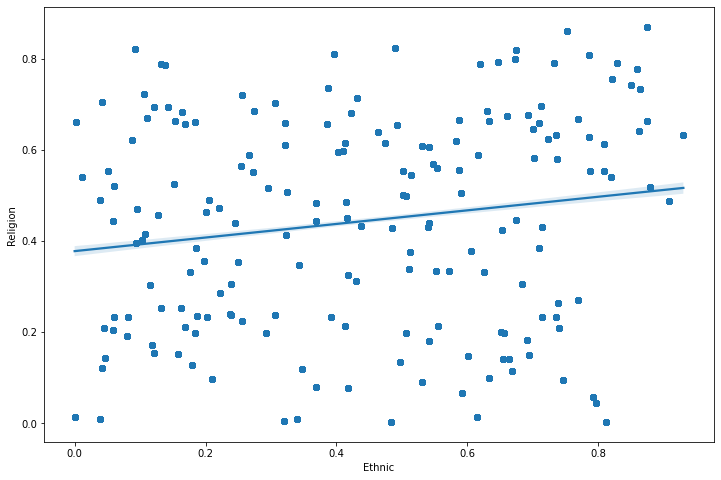

In [15]:
plt.figure(figsize=(12, 8))
sns.regplot(x=X, y=y)
plt.show()

### TODO: add some PROPER controls, reassess

### TODO: write a function that splits the dataset into training (.8 prop) and test (.2 prop), runs a model on the training, predicts using the test, and calculates RMSE between predicted y and true y - repeat and average